# Cofee Shop Sales Analisys

## Introducere

Acest set de date este ideal pentru a explora tendintele de vanzari in evolutie de-a lungul timpului, pentru a identifica zilele de varf de trafic al clientilor si pentru a explora valorile de performanta ale diferitelor produse. Setul de date cuprinde inregistrari tranzactionale de la Maven Roasters, o cafenea fictiva din New York care opereaza in trei locatii distincte. Acesta cuprinde detalii complete, cum ar fi datele tranzactiei, marcajele de timp, specificul geografic si informatiile la nivel de produs. Cercetatorii pot analiza frecventa vanzarilor de produse, pot identifica principalii factori de venit si pot investiga factorii care contribuie la fluctuatiile volumului vanzarilor.

## Cunoasterea Bazei de date

### Importuri

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib as plt
import matplotlib.pyplot as plT

### Citirea Bazei de Date si afisare

In [3]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


### Tipul coloanelor


In [11]:
df.dtypes

transaction_id        int64
transaction_date     object
transaction_time     object
transaction_qty       int64
store_id              int64
store_location       object
product_id            int64
unit_price          float64
product_category     object
product_type         object
product_detail       object
dtype: object

### Descrierea bazei de date

In [12]:
df.describe()

,transaction_id,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,1.438276,5.342063,47.918607,3.382219
std,43153.600016,0.542509,2.074241,17.930020,2.658723
min,1.000000,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2.000000,8.000000,60.000000,3.750000
max,149456.000000,8.000000,8.000000,87.000000,45.000000


### Valorie unice din coloane(cate sunt)

In [13]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
df=pd.DataFrame(df.nunique(), columns=['Unique values Count'])
print(df)

                  Unique values Count
transaction_id                 149116
transaction_date                  181
transaction_time                25762
transaction_qty                     6
store_id                            3
store_location                      3
product_id                         80
unit_price                         41
product_category                    9
product_type                       29
product_detail                     80


### Verificarea valorilor NULL sau NaN in Baza de date


In [2]:
missing_values = df.isnull().sum()

print("Valori lipsa in fiecare coloana:")
print(missing_values)

rows_with_missing_values = df[df.isnull().any(axis=1)]

print("\n Randuri cu valori lipsa:")
print(rows_with_missing_values)

NameError: name 'df' is not defined

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, transaction_id to product_detail
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unique values Count  11 non-null     int64
dtypes: int64(1)
memory usage: 476.0+ bytes


### Eliminarea valorilor Null sau Nan si a randurilor duplicate

In [4]:
df=df.dropna()
df=df.drop_duplicates()
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


### Verific daca sunt randuri duplicate

In [17]:
verif_duplicates=df.duplicated().any()
verif_duplicates

np.False_

### Histograme pentru coloanele numerice

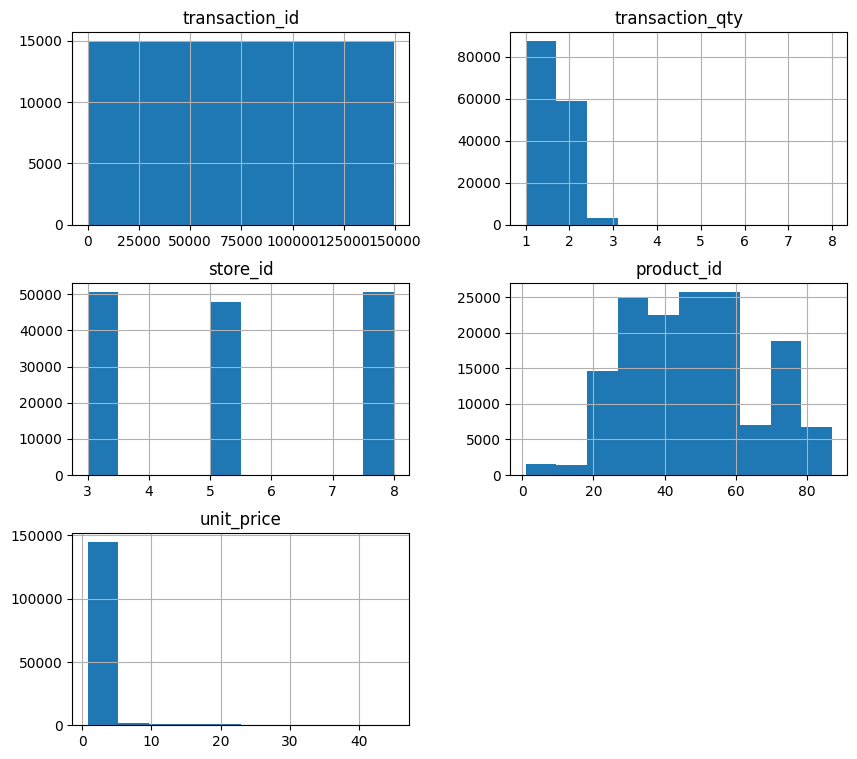

In [5]:
df=pd.read_csv("coffee-shop-sales-revenue.csv",sep="|")
import matplotlib.pyplot as plT
numeric_cols = df.select_dtypes(include=['number']).columns
nr = 10
df[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 3

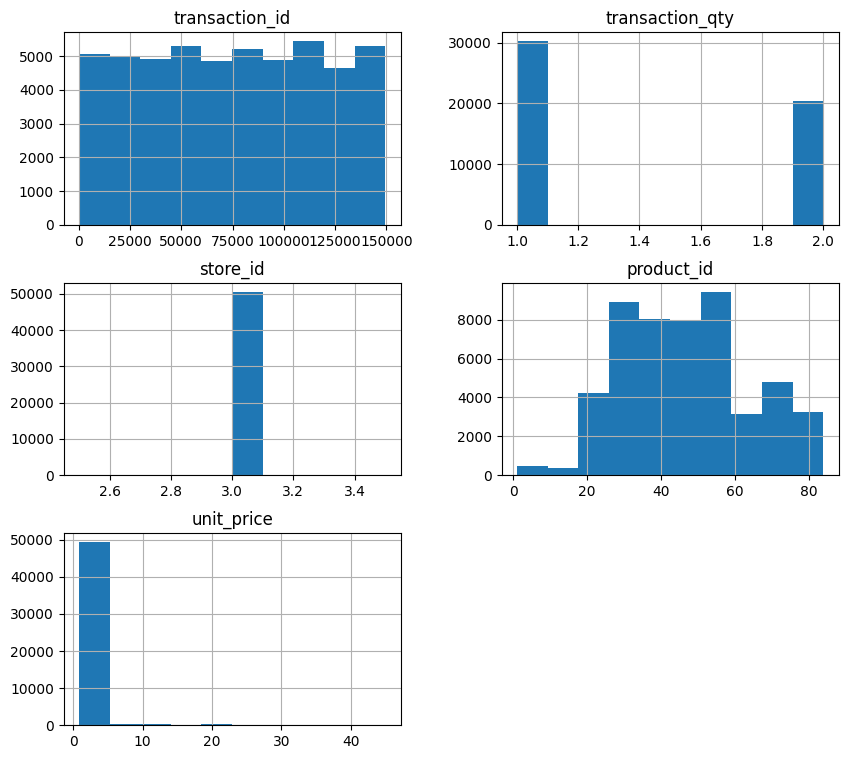

In [19]:

filtered_df_store_id_3 = df[df['store_id'] == 3]
nr = 10
filtered_df_store_id_3[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Histograme pentru store_id 5

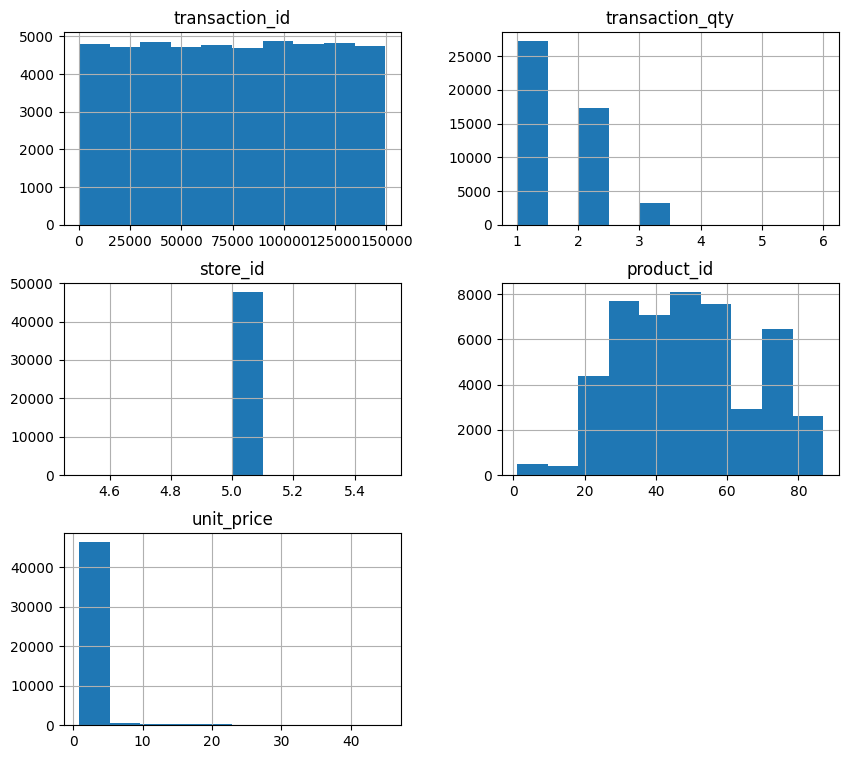

In [20]:
filtered_df_store_id_5 = df[df['store_id'] == 5]
nr = 10 
filtered_df_store_id_5[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

### Histograme pentru store_id 8

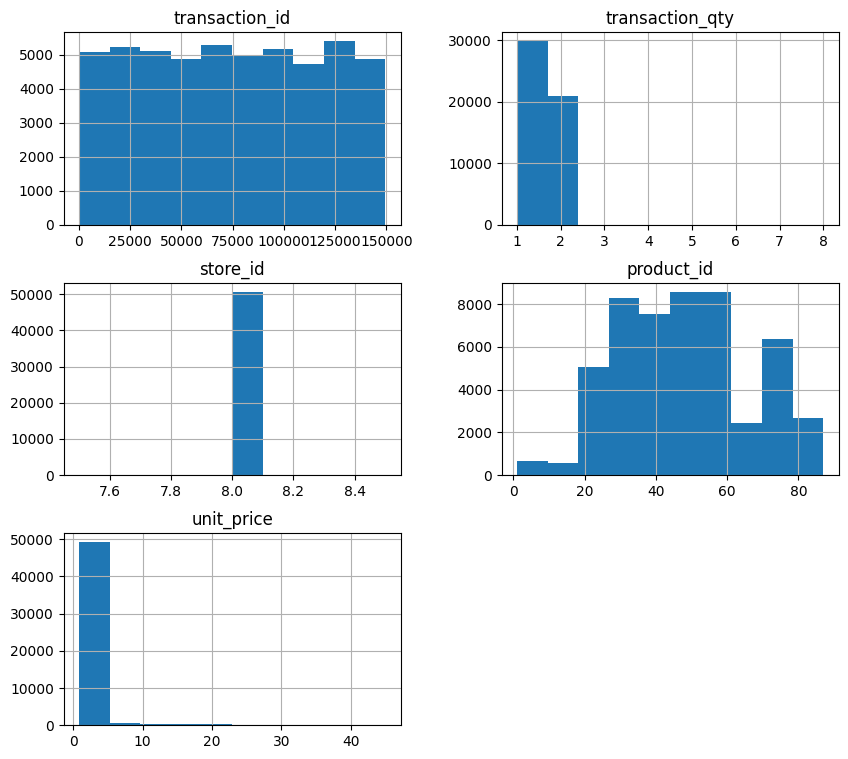

In [21]:
filtered_df_store_id_8= df[df['store_id'] == 8]
nr = 10  
filtered_df_store_id_8[numeric_cols].hist(figsize=(10, 9), bins=nr)
plT.show()

### Matrice de corelatie

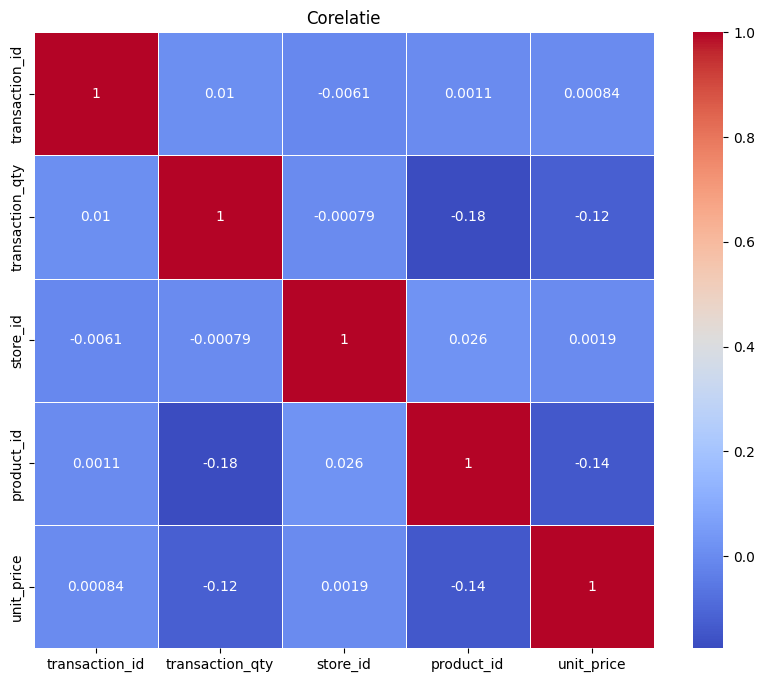

In [22]:


# Selectarea coloanelor numerice
numeric_df = df.select_dtypes(include=['number'])

# Calcularea matricei de corelatie
correlation_matrix = numeric_df.corr()


# print("Corelatie:")
# print(correlation_matrix)

plT.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plT.title('Corelatie')
plT.show()

### Gini index

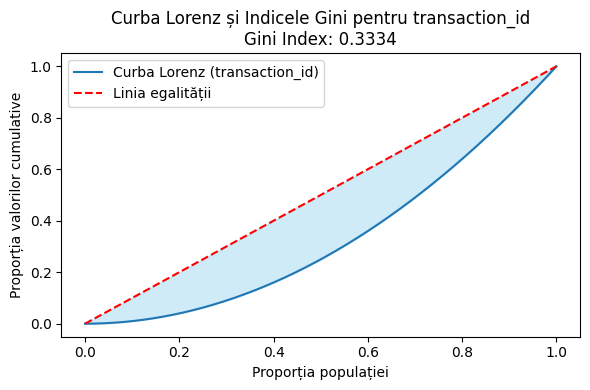

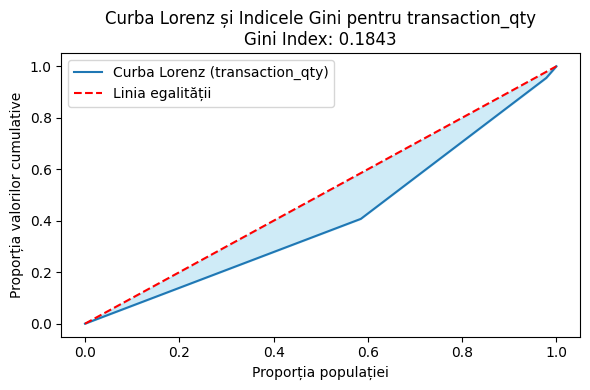

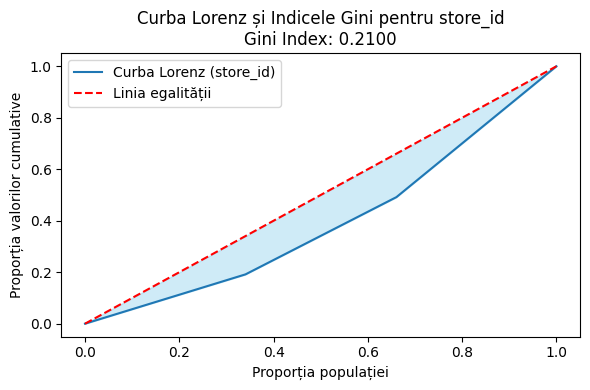

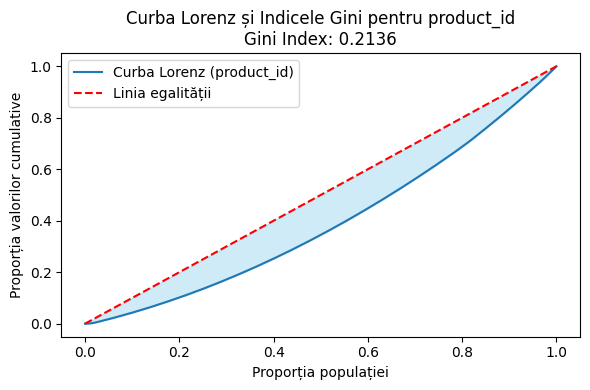

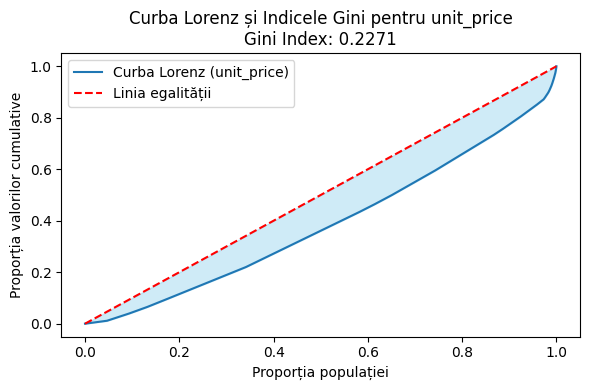

In [23]:
def lorenz_curve(array):
    array = np.sort(array)  # Sortare in ordine crescatoare
    cumulative_values = np.cumsum(array)  #Suma valori
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizare la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  
    return cumulative_values, gini

numeric_cols = df.select_dtypes(include=['number'])

# Crearea curbelor Lorenz si calcularea indicelui Gini pentru fiecare coloana numerica
for col in numeric_cols.columns:
    values = numeric_cols[col].dropna().values  #Eliminare valori lipsa
    cumulative_values, gini = lorenz_curve(values)
    

    plT.figure(figsize=(6, 4))
    plT.plot(np.linspace(0, 1, len(cumulative_values)), cumulative_values, label=f'Curba Lorenz ({col})')
    plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
    plT.fill_between(np.linspace(0, 1, len(cumulative_values)), cumulative_values, np.linspace(0, 1, len(cumulative_values)), color='skyblue', alpha=0.4)
    plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
    plT.xlabel('Proporția populației')
    plT.ylabel('Proporția valorilor cumulative')
    plT.legend()
    plT.tight_layout()
    plT.show()

### Information Quantity

In [24]:
def entropy(column):
    probabilities = column.value_counts(normalize=True)
    probabilities = probabilities[probabilities > 0]
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calcularea entropiei pentru fiecare coloana
entropy_values = {}
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':  # Pentru coloane categorice
        entropy_values[col] = entropy(df[col])
    elif np.issubdtype(df[col].dtype, np.number):  # Pentru coloane numerice
        entropy_values[col] = entropy(pd.cut(df[col], bins=10))  # Grupam valorile numerice in intervale

# Afisare entropiei
print("Entropia (Information Quantity) pentru fiecare coloana:")
for col, entropy in entropy_values.items():
    print(f"{col}: {entropy:.4f}")

Entropia (Information Quantity) pentru fiecare coloana:
transaction_id: 3.3219
transaction_date: 7.4365
transaction_time: 14.3346
transaction_qty: 1.1066
store_id: 1.5844
store_location: 1.5844
product_id: 2.9661
unit_price: 0.2518
product_category: 2.1508
product_type: 3.9336
product_detail: 5.9359


#### Entropia pentru fiecare coloana

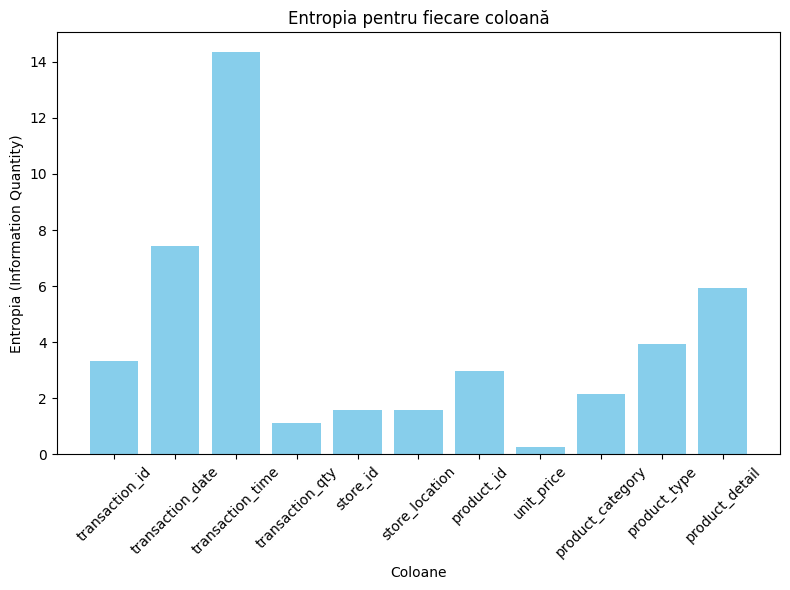

In [25]:

plT.figure(figsize=(8, 6))
plT.bar(entropy_values.keys(), entropy_values.values(), color='skyblue')
plT.xlabel('Coloane')
plT.ylabel('Entropia (Information Quantity)')
plT.title('Entropia pentru fiecare coloană')
plT.xticks(rotation=45)
plT.tight_layout()
plT.show()

### Store_id 3 Gini Index

Gini Index și Curba Lorenz pentru store_id 3:
  transaction_id: 0.3328


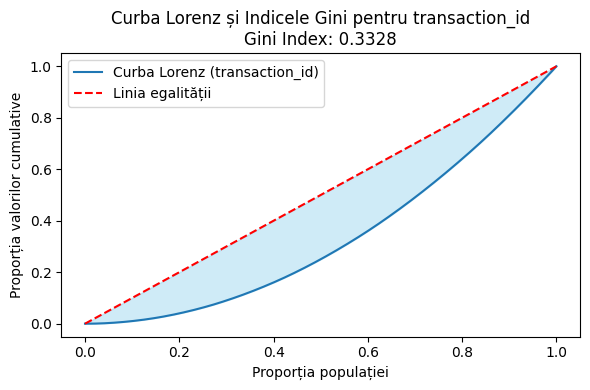

  transaction_qty: 0.1715


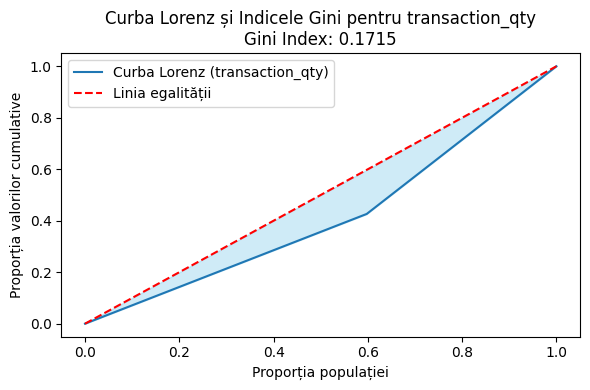

  product_id: 0.2068


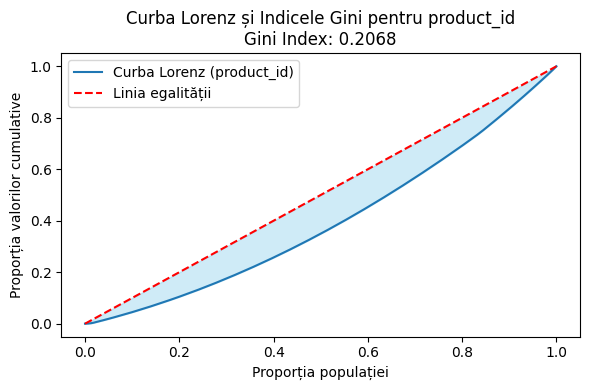

  unit_price: 0.2114


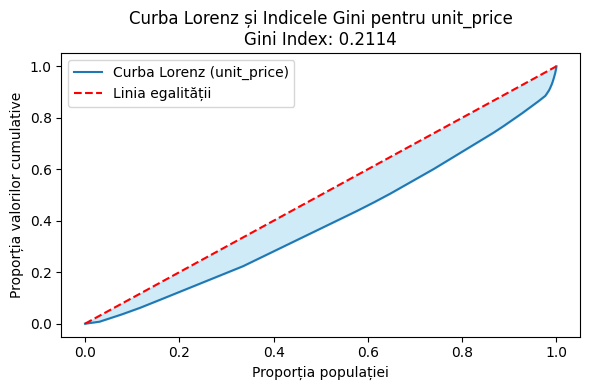

In [26]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare în ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values


# Filtrarea datelor pentru store_id = 3
filtered_df_store_id_3 = df[df['store_id'] == 3]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_3.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 3:")
for col in numeric_cols.columns:
    if filtered_df_store_id_3[col].sum() > 0:  # Verificam dacă exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_3[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

### Store_id 5 Gini Index

Gini Index și Curba Lorenz pentru store_id 5:
  transaction_id: 0.3331


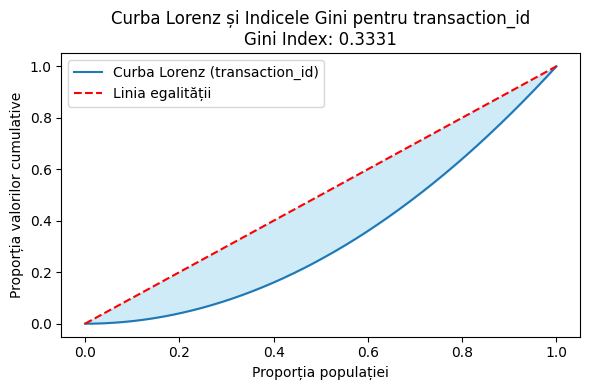

  transaction_qty: 0.2067


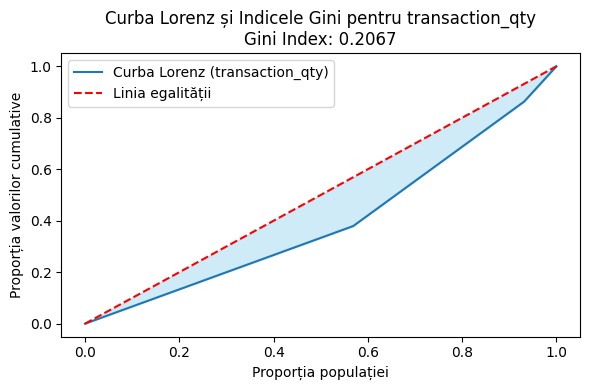

  product_id: 0.2140


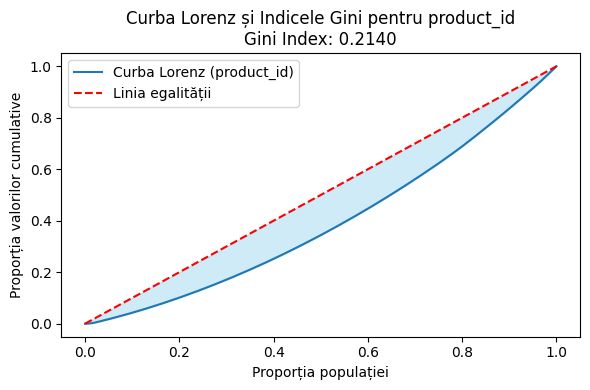

  unit_price: 0.2386


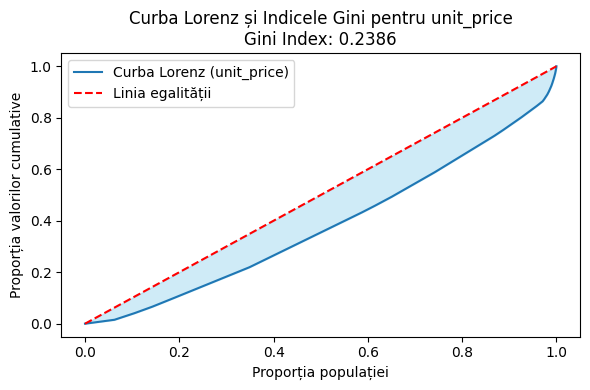

In [27]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare in ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values

# Filtrarea datelor pentru store_id = 5
filtered_df_store_id_5 = df[df['store_id'] == 5]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_5.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 5:")
for col in numeric_cols.columns:
    if filtered_df_store_id_5[col].sum() > 0:  # Verificam daca exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_5[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

### Store_id 8 Gini Index

Gini Index și Curba Lorenz pentru store_id 8:
  transaction_id: 0.3341


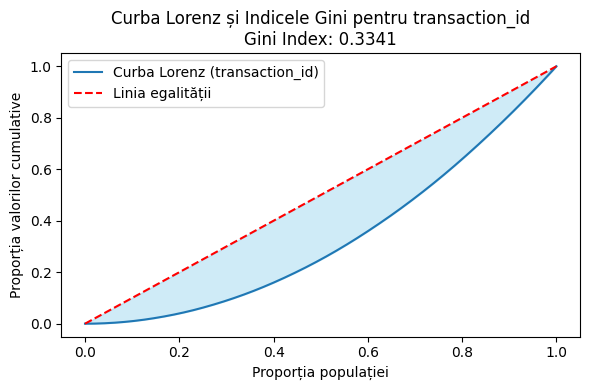

  transaction_qty: 0.1723


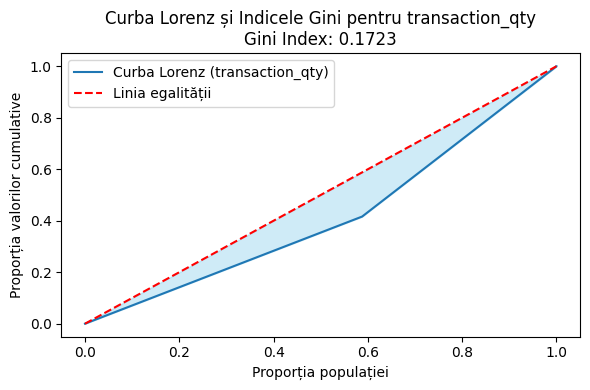

  product_id: 0.2187


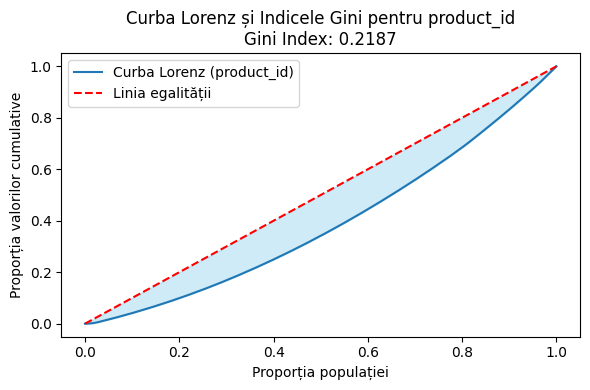

  unit_price: 0.2318


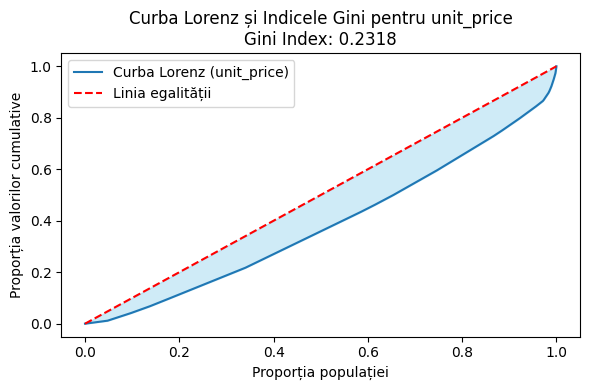

In [28]:
def gini_index_and_lorenz_curve(array):
    array = np.sort(array)  # Sortare în ordine crescatoare
    cumulative_values = np.cumsum(array)  # Suma valorilor
    cumulative_values = np.insert(cumulative_values, 0, 0)  
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalizam la 1
    gini = 1 - 2 * np.trapezoid(cumulative_values, dx=1/len(array))  # Calculam indicele Gini
    return gini, cumulative_values

# Filtrarea datelor pentru store_id = 8
filtered_df_store_id_8 = df[df['store_id'] == 8]

# Selectarea coloanelor numerice
numeric_cols = filtered_df_store_id_8.select_dtypes(include=['number']).drop(columns=['store_id'], errors='ignore')

# Calcularea Gini Index si desenarea curbei Lorenz pentru fiecare coloana numerica
print("Gini Index și Curba Lorenz pentru store_id 8:")
for col in numeric_cols.columns:
    if filtered_df_store_id_8[col].sum() > 0:  # Verificam daca exista valori nenule
        gini, lorenz_curve = gini_index_and_lorenz_curve(filtered_df_store_id_8[col].values)
        print(f"  {col}: {gini:.4f}")
        
        # Desenarea curbei Lorenz
        plT.figure(figsize=(6, 4))
        plT.plot(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, label=f'Curba Lorenz ({col})')
        plT.plot([0, 1], [0, 1], color='red', linestyle='--', label='Linia egalității')
        plT.fill_between(np.linspace(0, 1, len(lorenz_curve)), lorenz_curve, np.linspace(0, 1, len(lorenz_curve)), color='skyblue', alpha=0.4)
        plT.title(f'Curba Lorenz și Indicele Gini pentru {col}\nGini Index: {gini:.4f}')
        plT.xlabel('Proporția populației')
        plT.ylabel('Proporția valorilor cumulative')
        plT.legend()
        plT.tight_layout()
        plT.show()
    else:
        print(f"  {col}: Nu se poate calcula (toate valorile sunt 0)")

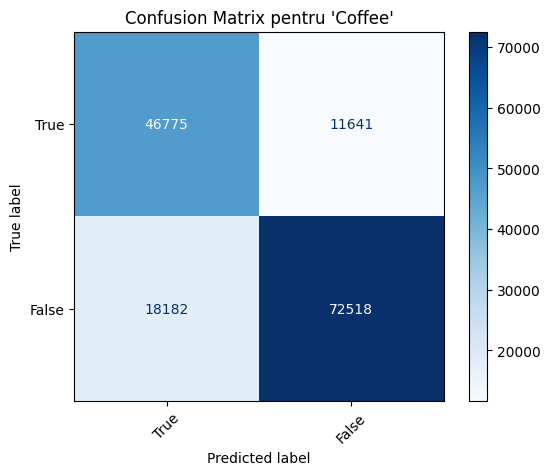

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

target_class = 'Coffee' 
true_labels_binary = (df['product_category'] == target_class).astype(int)  # 1 pentru clasa dorita, 0 altfel

np.random.seed(42) 
predicted_labels_binary = true_labels_binary.copy()
indices_to_modify = np.random.choice(len(true_labels_binary), size=int(0.2 * len(true_labels_binary)), replace=False)  # 20% zgomot
predicted_labels_binary.iloc[indices_to_modify] = 1 - predicted_labels_binary.iloc[indices_to_modify]  

# Calculam matricea de confuzie
cm = confusion_matrix(true_labels_binary, predicted_labels_binary, labels=[1, 0]) 

# Afisam matricea de confuzie
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['True', 'False'])
disp.plot(cmap='Blues', xticks_rotation=45)
plT.title(f"Confusion Matrix pentru '{target_class}'")
plT.show()

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 1. Load data
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")

# # 2. Data Cleaning
# df = df.dropna()
# df = df.drop_duplicates()

# # 3. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 4. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"

# # Create a binary target for classification
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 5. Split data into train/test sets
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# # Scale numerical features
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Train Models
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)

# # Cross-validation for Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_lin_reg = cv_scores_lin_reg.mean()

# # (b) Logistic Regression
# log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", solver="saga")
# log_reg.fit(X_train_clf, y_train_clf)
# y_pred_clf = log_reg.predict(X_test_clf)

# # Cross-validation for Logistic Regression
# cv_scores_log_reg = cross_val_score(log_reg, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_log_reg = cv_scores_log_reg.mean()

# # (c) Random Forest
# rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_reg.fit(X_train_reg, y_train_reg)
# y_pred_rf_reg = rf_reg.predict(X_test_reg)

# rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_clf.fit(X_train_clf, y_train_clf)
# y_pred_rf_clf = rf_clf.predict(X_test_clf)

# # Cross-validation for Random Forest Regression
# cv_scores_rf_reg = cross_val_score(rf_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_rf_reg = cv_scores_rf_reg.mean()

# # Cross-validation for Random Forest Classification
# cv_scores_rf_clf = cross_val_score(rf_clf, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_rf_clf = cv_scores_rf_clf.mean()

# # 7. Evaluate Models
# # Regression Metrics
# mse_lin_reg = mean_squared_error(y_test_reg, y_pred_reg)
# r2_lin_reg = r2_score(y_test_reg, y_pred_reg)
# mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
# r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# # Classification Metrics
# acc_log_reg = accuracy_score(y_test_clf, y_pred_clf)
# acc_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)

# # 8. Compare Models
# print("\n--- Comparison of Models ---")
# print("Linear Regression:")
# print(f"  Test MSE: {mse_lin_reg:.4f}, Test R2: {r2_lin_reg:.4f}, CV Mean R2: {mean_r2_lin_reg:.4f}")
# print("\nRandom Forest Regression:")
# print(f"  Test MSE: {mse_rf_reg:.4f}, Test R2: {r2_rf_reg:.4f}, CV Mean R2: {mean_r2_rf_reg:.4f}")
# print("\nLogistic Regression:")
# print(f"  Test Accuracy: {acc_log_reg:.4f}, CV Mean Accuracy: {mean_acc_log_reg:.4f}")
# print("\nRandom Forest Classification:")
# print(f"  Test Accuracy: {acc_rf_clf:.4f}, CV Mean Accuracy: {mean_acc_rf_clf:.4f}")

# # Determine the best model
# best_regression_model = "Random Forest Regression" if mean_r2_rf_reg > mean_r2_lin_reg else "Linear Regression"
# best_classification_model = "Random Forest Classification" if mean_acc_rf_clf > mean_acc_log_reg else "Logistic Regression"

# print("\nBest Regression Model:", best_regression_model)
# print("Best Classification Model:", best_classification_model)

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 1. Load data
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")

# # 2. Data Cleaning
# df = df.dropna()
# df = df.drop_duplicates()

# # 3. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 4. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"

# # Create a binary target for classification
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 5. Split data into train/test sets
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# # Scale numerical features
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Train Models
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)

# # Cross-validation for Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# print("\nCross-Validation Results for Linear Regression:")
# print(f"R2 Scores: {cv_scores_lin_reg}")
# print(f"Mean R2: {cv_scores_lin_reg.mean():.2f}")
# # print(f"Standard Deviation of R2: {cv_scores_lin_reg.std():.2f}")

# # (b) Logistic Regression
# log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", solver="saga")
# log_reg.fit(X_train_clf, y_train_clf)
# y_pred_clf = log_reg.predict(X_test_clf)

# # Cross-validation for Logistic Regression
# cv_scores_log_reg = cross_val_score(log_reg, X, y_classification, cv=5, scoring="accuracy")
# print("\nCross-Validation Results for Logistic Regression:")
# print(f"Accuracy Scores: {cv_scores_log_reg}")
# print(f"Mean Accuracy: {cv_scores_log_reg.mean():.2f}")
# # print(f"Standard Deviation of Accuracy: {cv_scores_log_reg.std():.2f}")

# # (c) Random Forest
# rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_reg.fit(X_train_reg, y_train_reg)
# y_pred_rf_reg = rf_reg.predict(X_test_reg)

# # rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
# # rf_clf.fit(X_train_clf, y_train_clf)
# # y_pred_rf_clf = rf_clf.predict(X_test_clf)

# # Cross-validation for Random Forest Regression
# cv_scores_rf_reg = cross_val_score(rf_reg, X, y_regression, cv=5, scoring="r2")
# print("\nCross-Validation Results for Random Forest Regression:")
# print(f"R2 Scores: {cv_scores_rf_reg}")
# print(f"Mean R2: {cv_scores_rf_reg.mean():.2f}")
# # print(f"Standard Deviation of R2: {cv_scores_rf_reg.std():.2f}")

# # # Cross-validation for Random Forest Classification
# # cv_scores_rf_clf = cross_val_score(rf_clf, X, y_classification, cv=5, scoring="accuracy")
# # print("\nCross-Validation Results for Random Forest Classification:")
# # print(f"Accuracy Scores: {cv_scores_rf_clf}")
# # print(f"Mean Accuracy: {cv_scores_rf_clf.mean():.2f}")
# # print(f"Standard Deviation of Accuracy: {cv_scores_rf_clf.std():.2f}")

# # 7. Evaluate Models
# # Regression Metrics
# print("\nLinear Regression MSE:", mean_squared_error(y_test_reg, y_pred_reg))
# print("Linear Regression R2:", r2_score(y_test_reg, y_pred_reg))
# print("Random Forest Regression MSE:", mean_squared_error(y_test_reg, y_pred_rf_reg))
# print("Random Forest Regression R2:", r2_score(y_test_reg, y_pred_rf_reg))

# # Classification Metrics
# print("\nLogistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
# # print("Random Forest Classification Accuracy:", accuracy_score(y_test_clf, y_pred_rf_clf))
# # print("\nClassification Report (Logistic Regression):\n", classification_report(y_test_clf, y_pred_clf))
# # print("\nClassification Report (Random Forest):\n", classification_report(y_test_clf, y_pred_rf_clf))

# # Confusion Matrix for Logistic Regression
# cm_log = confusion_matrix(y_test_clf, y_pred_clf)
# disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Expensive", "Expensive"])
# disp_log.plot(cmap="Blues")
# plT.title("Confusion Matrix - Logistic Regression")
# plT.show()

# # Confusion Matrix for Random Forest
# cm_rf = confusion_matrix(y_test_clf, y_pred_rf_clf)
# disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Not Expensive", "Expensive"])
# disp_rf.plot(cmap="Blues")
# plT.title("Confusion Matrix - Random Forest")
# plT.show()
# # Logistic Regression Accuracy
# log_reg_accuracy = accuracy_score(y_test_clf, y_pred_clf)
# print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")

# # Linear Regression R²
# lin_reg_r2 = r2_score(y_test_reg, y_pred_reg)
# print(f"Linear Regression R²: {lin_reg_r2:.4f}")

# # Random Forest Regression R²
# rf_reg_r2 = r2_score(y_test_reg, y_pred_rf_reg)
# print(f"Random Forest Regression R²: {rf_reg_r2:.4f}")




In [ ]:
# def compare_models(results):
#     """
#     Compara modelele de regresie și clasificare și returnează cele mai bune modele.
    
#     Parameters:
#         results (dict): Dicționar cu rezultatele modelelor.
        
#     Returns:
#         dict: Cele mai bune modele pentru regresie și clasificare.
#     """
#     # Comparăm modelele de regresie pe baza R²
#     best_regression_model = max(results['regression'], key=lambda x: results['regression'][x]['mean_r2'])
    
#     # Comparăm modelele de clasificare pe baza acurateței
#     best_classification_model = max(results['classification'], key=lambda x: results['classification'][x]['mean_accuracy'])
    
#     return {
#         "best_regression_model": best_regression_model,
#         "best_classification_model": best_classification_model
#     }


# # 1. Calculăm rezultatele pentru fiecare model
# results = {
#     "regression": {
#         "Linear Regression": {
#             "mean_r2": cv_scores_lin_reg.mean(),
#             "test_r2": r2_score(y_test_reg, y_pred_reg),
#             "test_mse": mean_squared_error(y_test_reg, y_pred_reg)
#         },
#         "Random Forest Regression": {
#             "mean_r2": cv_scores_rf_reg.mean(),
#             "test_r2": r2_score(y_test_reg, y_pred_rf_reg),
#             "test_mse": mean_squared_error(y_test_reg, y_pred_rf_reg)
#         }
#     },
#     "classification": {
#         "Logistic Regression": {
#             "mean_accuracy": cv_scores_log_reg.mean(),
#             "test_accuracy": accuracy_score(y_test_clf, y_pred_clf)
#         }
#     }
# }

# # 2. Comparăm modelele
# best_models = compare_models(results)

# # 3. Afișăm rezultatele
# print("\n--- Cross-Validation Results ---")
# print("Linear Regression:")
# print(f"  Mean R2: {cv_scores_lin_reg.mean():.4f}")
# print("Random Forest Regression:")
# print(f"  Mean R2: {cv_scores_rf_reg.mean():.4f}")
# print("Logistic Regression:")
# print(f"  Mean Accuracy: {cv_scores_log_reg.mean():.4f}")

# print("\n--- Test Set Performance ---")
# print("Linear Regression:")
# print(f"  Test MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}, Test R2: {r2_score(y_test_reg, y_pred_reg):.4f}")
# print("Random Forest Regression:")
# print(f"  Test MSE: {mean_squared_error(y_test_reg, y_pred_rf_reg):.4f}, Test R2: {r2_score(y_test_reg, y_pred_rf_reg):.4f}")
# print("Logistic Regression:")
# print(f"  Test Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}")

# print("\n--- Best Models ---")
# print(f"Best Regression Model: {best_models['best_regression_model']}")

In [ ]:
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# # 1. Load data
# df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
# df = df.dropna().drop_duplicates()

# # 2. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])

# # 3. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 4. Split data
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]
# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# # 5. Scale data
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Hyperparameter Optimization
# log_reg_params = {'C': [0.1, 1, 10], 'solver': ['liblinear'], 'class_weight': ['balanced']}
# rf_reg_params = {'n_estimators': [50, 100], 'max_depth': [None, 10]}

# log_reg_random = RandomizedSearchCV(LogisticRegression(max_iter=5000, random_state=42), log_reg_params, scoring='accuracy', cv=3, verbose=1, n_jobs=-1, n_iter=5)
# rf_reg_random = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_reg_params, scoring='r2', cv=3, verbose=1, n_jobs=-1, n_iter=5)

# log_reg_random.fit(X_train_clf, y_train_clf)
# rf_reg_random.fit(X_train_reg, y_train_reg)

# # 7. Evaluate
# print("Best Logistic Regression Params:", log_reg_random.best_params_)
# print("Best Random Forest Regression Params:", rf_reg_random.best_params_)

# y_pred_clf = log_reg_random.best_estimator_.predict(X_test_clf)
# y_pred_reg = rf_reg_random.best_estimator_.predict(X_test_reg)

# print("Logistic Regression Accuracy:", accuracy_score(y_test_clf, y_pred_clf))
# print("Random Forest Regression R²:", r2_score(y_test_reg, y_pred_reg))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 36 candidates, totalling 108 fits

--- Results Without Cross-Validation ---
Linear Regression: Test MSE: 6.3874, Test R²: 0.0562
Logistic Regression: Test Accuracy: 0.7544
Random Forest Regression: Test MSE: 0.0196, Test R²: 0.9971

--- Results With Cross-Validation ---
Linear Regression: Cross-Validation Mean R²: 0.0521
Logistic Regression: Cross-Validation Mean Accuracy: 0.7586
Random Forest Regression: Cross-Validation Mean R²: 0.9968


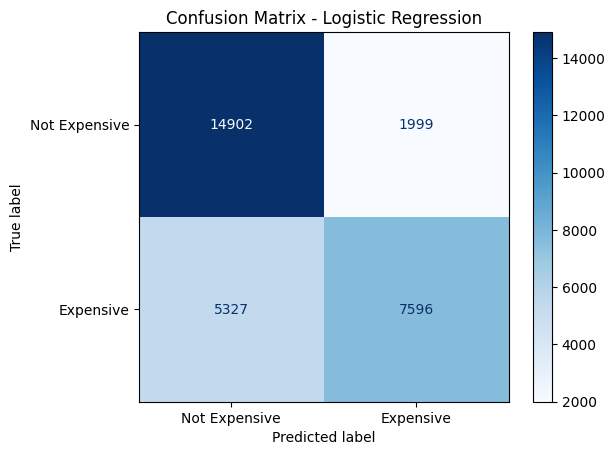

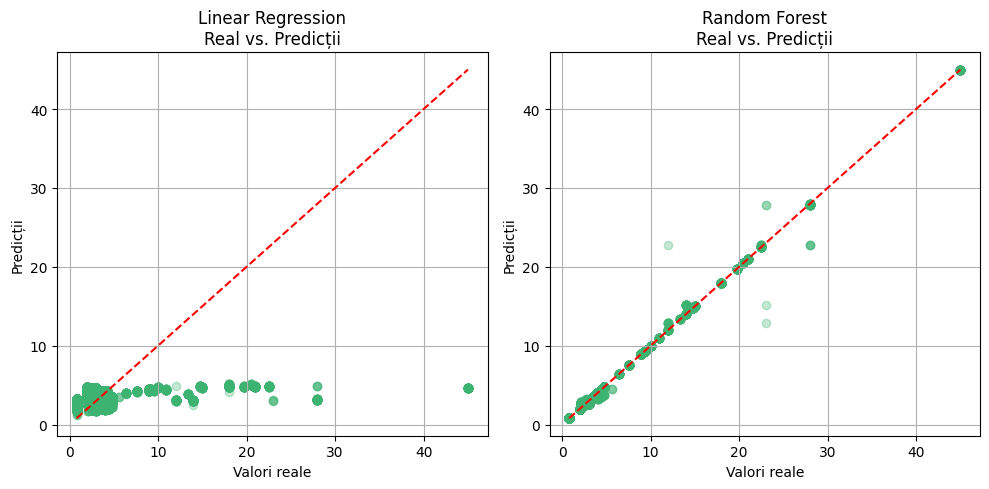

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# 1. Citirea și curățarea datelor
df = pd.read_csv("coffee-shop-sales-revenue.csv", sep="|")
df = df.dropna().drop_duplicates()

# 2. Codificarea coloanelor categorice
categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 3. Selectarea caracteristicilor și a țintelor
features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
target_regression = "unit_price"
target_classification = "is_expensive"

# Crearea unei ținte binare pentru clasificare
df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# 4. Împărțirea datelor în seturi de antrenament și testare
X = df[features]
y_regression = df[target_regression]
y_classification = df[target_classification]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

# 5. Scalarea caracteristicilor numerice
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

# 6. Optimizarea hiperparametrilor
# (a) Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]
}
log_reg_grid = GridSearchCV(
    LogisticRegression(max_iter=5000, random_state=42),
    param_grid=log_reg_params,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)
log_reg_grid.fit(X_train_clf, y_train_clf)
best_log_reg = log_reg_grid.best_estimator_

# (b) Random Forest Regression
rf_reg_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_reg_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_reg_params,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)
rf_reg_grid.fit(X_train_reg, y_train_reg)
best_rf_reg = rf_reg_grid.best_estimator_

# 7. Antrenarea modelelor fără cross-validation
# (a) Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
y_pred_reg = lin_reg.predict(X_test_reg)
mse_lin_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_lin_reg = r2_score(y_test_reg, y_pred_reg)

# (b) Logistic Regression
y_pred_clf = best_log_reg.predict(X_test_clf)
acc_log_reg = accuracy_score(y_test_clf, y_pred_clf)

# (c) Random Forest Regression
y_pred_rf_reg = best_rf_reg.predict(X_test_reg)
mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# 8. Evaluarea modelelor cu cross-validation
# Cross-validation pentru Linear Regression
cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
mean_r2_lin_reg = cv_scores_lin_reg.mean()

# Cross-validation pentru Logistic Regression
cv_scores_log_reg = cross_val_score(best_log_reg, X, y_classification, cv=5, scoring="accuracy")
mean_acc_log_reg = cv_scores_log_reg.mean()

# Cross-validation pentru Random Forest Regression
cv_scores_rf_reg = cross_val_score(best_rf_reg, X, y_regression, cv=5, scoring="r2")
mean_r2_rf_reg = cv_scores_rf_reg.mean()

# 9. Afișarea rezultatelor
print("\n--- Results Without Cross-Validation ---")
print(f"Linear Regression: Test MSE: {mse_lin_reg:.4f}, Test R²: {r2_lin_reg:.4f}")
print(f"Logistic Regression: Test Accuracy: {acc_log_reg:.4f}")
print(f"Random Forest Regression: Test MSE: {mse_rf_reg:.4f}, Test R²: {r2_rf_reg:.4f}")

print("\n--- Results With Cross-Validation ---")
print(f"Linear Regression: Cross-Validation Mean R²: {mean_r2_lin_reg:.4f}")
print(f"Logistic Regression: Cross-Validation Mean Accuracy: {mean_acc_log_reg:.4f}")
print(f"Random Forest Regression: Cross-Validation Mean R²: {mean_r2_rf_reg:.4f}")

# 10. Matricea de confuzie pentru Logistic Regression
cm_log = confusion_matrix(y_test_clf, y_pred_clf)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Expensive", "Expensive"])
disp_log.plot(cmap="Blues")
plT.title("Confusion Matrix - Logistic Regression")
plT.show()

# Generarea graficelor pentru fiecare model
models_preds = {
    "Linear Regression": y_pred_reg,
    "Random Forest": y_pred_rf_reg
}

plT.figure(figsize=(10, 5))

for i, (name, y_pred) in enumerate(models_preds.items(), 1):
    plT.subplot(1, len(models_preds), i)
    plT.scatter(y_test_reg, y_pred, alpha=0.3, color='mediumseagreen')
    plT.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
    plT.xlabel("Valori reale")
    plT.ylabel("Predicții")
    plT.title(f"{name}\nReal vs. Predicții")
    plT.grid(True)

plT.tight_layout()
plT.show()



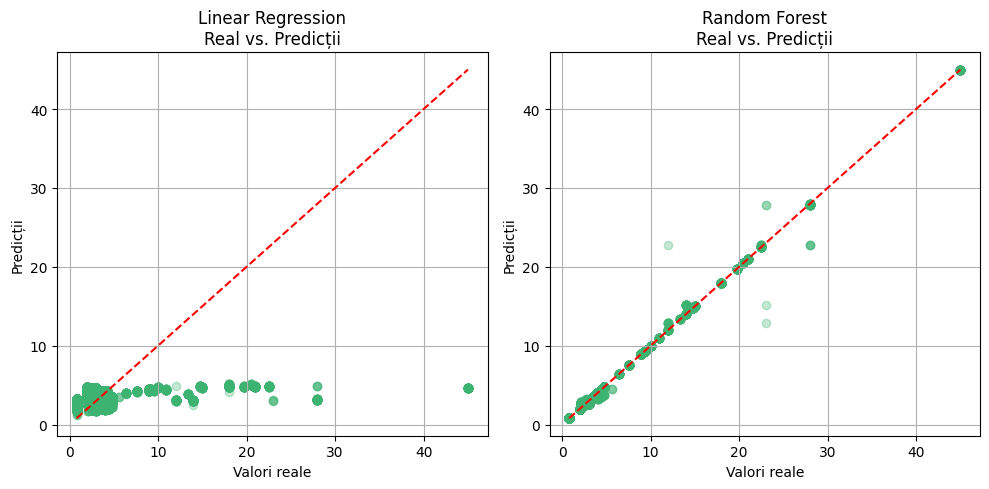

In [13]:
# Generarea graficelor pentru fiecare model
models_preds = {
    "Linear Regression": y_pred_reg,
    "Random Forest": y_pred_rf_reg
}

plt.figure(figsize=(10, 5))

for i, (name, y_pred) in enumerate(models_preds.items(), 1):
    plt.subplot(1, len(models_preds), i)
    plt.scatter(y_test_reg, y_pred, alpha=0.3, color='mediumseagreen')
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
    plt.xlabel("Valori reale")
    plt.ylabel("Predicții")
    plt.title(f"{name}\nReal vs. Predicții")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.model_selection import GridSearchCV, cross_val_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# # 1. Definim grilele de hiperparametri
# log_reg_params = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Adaugă mai multe valori pentru regularizare
#     'solver': ['liblinear', 'saga'],  # Testează mai mulți solvers
#     'class_weight': ['balanced', None]  # Include și opțiunea fără ponderare
# }

# rf_reg_params = {
#     'n_estimators': [50, 100],  # Reduce numărul de estimatori
#     'max_depth': [None, 10],  # Reduce numărul de adâncimi
#     'min_samples_split': [2, 5],  # Reduce numărul de combinații
#     'min_samples_leaf': [1, 2]
# }

# # 2. Optimizăm Logistic Regression
# log_reg_grid = GridSearchCV(
#     LogisticRegression(max_iter=5000, random_state=42),
#     param_grid=log_reg_params,
#     scoring='accuracy',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
# log_reg_grid.fit(X_train_clf, y_train_clf)

# # 3. Optimizăm Random Forest Regression
# rf_reg_grid = GridSearchCV(
#     RandomForestRegressor(random_state=42),
#     param_grid=rf_reg_params,
#     scoring='r2',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )
# rf_reg_grid.fit(X_train_reg, y_train_reg)

# # 4. Evaluăm modelele optimizate
# # Logistic Regression
# best_log_reg = log_reg_grid.best_estimator_
# y_pred_clf_optimized = best_log_reg.predict(X_test_clf)
# log_reg_accuracy = accuracy_score(y_test_clf, y_pred_clf_optimized)

# # Cross-validation pentru Logistic Regression
# cv_scores_log_reg = cross_val_score(best_log_reg, X_train_clf, y_train_clf, cv=5, scoring='accuracy')
# mean_cv_log_reg = cv_scores_log_reg.mean()

# # Random Forest Regression
# best_rf_reg = rf_reg_grid.best_estimator_
# y_pred_reg_optimized = best_rf_reg.predict(X_test_reg)
# rf_reg_r2 = r2_score(y_test_reg, y_pred_reg_optimized)
# rf_reg_mse = mean_squared_error(y_test_reg, y_pred_reg_optimized)

# # Cross-validation pentru Random Forest Regression
# cv_scores_rf_reg = cross_val_score(best_rf_reg, X_train_reg, y_train_reg, cv=5, scoring='r2')
# mean_cv_rf_reg = cv_scores_rf_reg.mean()

# # 5. Afișăm rezultatele
# print("\n--- Logistic Regression Results After Hyperparameter Optimization ---")
# print(f"Best Parameters: {log_reg_grid.best_params_}")
# print(f"Test Accuracy: {log_reg_accuracy:.4f}")
# print(f"Cross-Validation Mean Accuracy: {mean_cv_log_reg:.4f}")

# print("\n--- Random Forest Regression Results After Hyperparameter Optimization ---")
# print(f"Best Parameters: {rf_reg_grid.best_params_}")
# print(f"Test R²: {rf_reg_r2:.4f}")
# print(f"Test MSE: {rf_reg_mse:.4f}")
# print(f"Cross-Validation Mean R²: {mean_cv_rf_reg:.4f}")

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.metrics import (
#     mean_squared_error,
#     r2_score,
#     accuracy_score,
#     classification_report,
#     confusion_matrix,
#     ConfusionMatrixDisplay,
# )

# # 3. Encode categorical columns
# categorical_columns = ["store_location", "product_category", "product_type", "product_detail"]
# label_encoders = {}
# for col in categorical_columns:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])
#     label_encoders[col] = le

# # 4. Feature Selection
# features = [col for col in df.columns if col not in ["transaction_id", "transaction_date", "transaction_time", "unit_price"]]
# target_regression = "unit_price"
# target_classification = "is_expensive"

# # Create a binary target for classification
# df[target_classification] = (df[target_regression] > df[target_regression].median()).astype(int)

# # 5. Split data into train/test sets
# X = df[features]
# y_regression = df[target_regression]
# y_classification = df[target_classification]

# X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)
# X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
#     X, y_classification, test_size=0.2, random_state=42, stratify=y_classification
# )

# # Scale numerical features
# scaler = StandardScaler()
# X_train_reg = scaler.fit_transform(X_train_reg)
# X_test_reg = scaler.transform(X_test_reg)
# X_train_clf = scaler.fit_transform(X_train_clf)
# X_test_clf = scaler.transform(X_test_clf)

# # 6. Train Models Without Cross-Validation
# # (a) Linear Regression
# lin_reg = LinearRegression()
# lin_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg = lin_reg.predict(X_test_reg)
# mse_lin_reg = mean_squared_error(y_test_reg, y_pred_reg)
# r2_lin_reg = r2_score(y_test_reg, y_pred_reg)

# # (b) Logistic Regression
# log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced", solver="saga")
# log_reg.fit(X_train_clf, y_train_clf)
# y_pred_clf = log_reg.predict(X_test_clf)
# acc_log_reg = accuracy_score(y_test_clf, y_pred_clf)

# # (c) Random Forest Regression
# rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
# rf_reg.fit(X_train_reg, y_train_reg)
# y_pred_rf_reg = rf_reg.predict(X_test_reg)
# mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
# r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

# # (d) Decision Tree Classifier
# dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3)
# dt_clf.fit(X_train_clf, y_train_clf)
# y_pred_clf_dt = dt_clf.predict(X_test_clf)
# acc_dt_clf = accuracy_score(y_test_clf, y_pred_clf_dt)

# # (e) Decision Tree Regressor
# dt_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
# dt_reg.fit(X_train_reg, y_train_reg)
# y_pred_reg_dt = dt_reg.predict(X_test_reg)
# mse_dt_reg = mean_squared_error(y_test_reg, y_pred_reg_dt)
# r2_dt_reg = r2_score(y_test_reg, y_pred_reg_dt)

# # Display Results Without Cross-Validation
# print("\n--- Results Without Cross-Validation ---")
# print(f"Linear Regression: Test MSE: {mse_lin_reg:.4f}, Test R²: {r2_lin_reg:.4f}")
# print(f"Logistic Regression: Test Accuracy: {acc_log_reg:.4f}")
# print(f"Random Forest Regression: Test MSE: {mse_rf_reg:.4f}, Test R²: {r2_rf_reg:.4f}")
# print(f"Decision Tree Classifier: Test Accuracy: {acc_dt_clf:.4f}")
# print(f"Decision Tree Regressor: Test MSE: {mse_dt_reg:.4f}, Test R²: {r2_dt_reg:.4f}")

# # 7. Train Models With Cross-Validation
# # Cross-validation for Linear Regression
# cv_scores_lin_reg = cross_val_score(lin_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_lin_reg = cv_scores_lin_reg.mean()

# # Cross-validation for Logistic Regression
# cv_scores_log_reg = cross_val_score(log_reg, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_log_reg = cv_scores_log_reg.mean()

# # Cross-validation for Random Forest Regression
# cv_scores_rf_reg = cross_val_score(rf_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_rf_reg = cv_scores_rf_reg.mean()

# # Cross-validation for Decision Tree Classifier
# cv_scores_dt_clf = cross_val_score(dt_clf, X, y_classification, cv=5, scoring="accuracy")
# mean_acc_dt_clf = cv_scores_dt_clf.mean()

# # Cross-validation for Decision Tree Regressor
# cv_scores_dt_reg = cross_val_score(dt_reg, X, y_regression, cv=5, scoring="r2")
# mean_r2_dt_reg = cv_scores_dt_reg.mean()

# # Display Results With Cross-Validation
# print("\n--- Results With Cross-Validation ---")
# print(f"Linear Regression: Cross-Validation Mean R²: {mean_r2_lin_reg:.4f}")
# print(f"Logistic Regression: Cross-Validation Mean Accuracy: {mean_acc_log_reg:.4f}")
# print(f"Random Forest Regression: Cross-Validation Mean R²: {mean_r2_rf_reg:.4f}")
# print(f"Decision Tree Classifier: Cross-Validation Mean Accuracy: {mean_acc_dt_clf:.4f}")
# print(f"Decision Tree Regressor: Cross-Validation Mean R²: {mean_r2_dt_reg:.4f}")

# # Confusion Matrix for Logistic Regression
# cm_log = confusion_matrix(y_test_clf, y_pred_clf)
# disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Not Expensive", "Expensive"])
# disp_log.plot(cmap="Blues")
# plT.title("Confusion Matrix - Logistic Regression")
# plT.show()

# # Confusion Matrix for Decision Tree Classifier
# cm_dt_clf = confusion_matrix(y_test_clf, y_pred_clf_dt)
# disp_dt_clf = ConfusionMatrixDisplay(confusion_matrix=cm_dt_clf, display_labels=["Not Expensive", "Expensive"])
# disp_dt_clf.plot(cmap="Blues")
# plT.title("Confusion Matrix - Decision Tree Classifier")
# plT.show()